In [3]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import numpy as np
import re

In [4]:
cnn_df = pd.read_csv('data/cnn.csv')
fox_df = pd.read_csv('data/fox.csv')

In [130]:
client = MongoClient()
db = client.capstone
collection = db.onion1
docs = collection.find()


In [127]:
def onion_cleaner(mongo_cursor):
    '''
    input: mongo_cursor - cursor for the onion documents that 
    need cleaning
    output: dataframe with articles cleaned and stripped of characters
    Also adds Satire, CNN, and Fox columns for testing purposes
    '''
    dict_list = []
    # for loop iterates through mongo cursor and removes '_id'dict
    # it also breaks apart the dictionary into keys and values and 
    # appends to the dict_list
    for x in mongo_cursor:
        x.pop('_id')
        q = list(x.items())
        dict_list.append(q)
    # Converts the dict_list to an array
    art_arr = np.array(dict_list)
    # Gets the shape of the array so it can be reshaped
    art_shape = art_arr.shape
    # Reshapes array so it is 2D
    exp = art_arr.reshape(art_shape[0],art_shape[2])
    # Creates DF with URL and Article columns
    df = pd.DataFrame(exp, columns=['Title', 'Article'])
    # Converts Article column to list for text processing
    art = list(df['Article'])
    clean_list = []
    # Removes unwanted characters in article text and then appends
    # to clean_list
    for sample in art:
        sample1 = re.sub('<br/>', '', sample)
        sample2 = re.sub('</p>', '', sample1)
        sample3 = re.sub('—', ' ', sample2)
        sample4 = re.sub('<em>', '', sample3)
        sample5 = re.sub('</em>', '', sample4)
        sample6 = re.sub('\xa0', '', sample5)
        sample7 = re.sub('<p>', '', sample6)
        sample8 = re.sub('sic', '', sample7)
        sample9 = re.sub('[)(,.]', '', sample8)
        clean_list.append(sample9.lower())
    # Adds cleaned articles back to DF
    df['Article'] = clean_list
    # Creates dummies columns for future testing
    df['Satire'] = 1
    df['CNN'] = 0
    df['Fox']= 0
    return df

In [128]:
def cnn_cleaner(cnn_df):
    cnn_list = list(cnn_df.content)
    clean_cnn_list = []
    for article in cnn_list:
        clean_article = re.sub('CNN', '', article)
        clean_article2 = re.sub('[)(,.]', '', clean_article)
        clean_cnn_list.append(clean_article2.lower())
    clean_cnn_df = pd.DataFrame(clean_cnn_list, columns=['Article'])
    clean_cnn_df['Satire'] = 0
    clean_cnn_df['CNN'] = 1
    clean_cnn_df['Fox'] = 0
    return clean_cnn_df
        

In [129]:
def fox_cleaner(fox_df):
    fox_list = list(fox_df.content)
    clean_fox_list = []
    for article in fox_list:
        clean = re.sub('[)(,.]', '', article)
        clean_fox_list.append(clean.lower())
    clean_fox_df = pd.DataFrame(clean_fox_list, columns=['Article'])
    clean_fox_df['Satire'] = 0
    clean_fox_df['CNN'] = 0
    clean_fox_df['Fox'] = 1
    return clean_fox_df

In [112]:
fox_cleaner(fox_df)

,Article,Satire,CNN,Fox
0,More than a dozen people were hurt after mass...,0,0,1
1,Republican presidential candidate Ben Carson’...,0,0,1
2,Democratic presidential candidate Martin O’Ma...,0,0,1
3,A nasty battle has broken out in the Republic...,0,0,1
4,Donald Trump launched new attacks against Bil...,0,0,1
5,Two Munich train stations were evacuated Thur...,0,0,1
6,Authorities are stepping up security for New ...,0,0,1
7,In Bangkok partygoers will ring in the new ...,0,0,1
8,The plunge in oil prices has given a needed b...,0,0,1
9,Oil prices capped a second straight year as on...,0,0,1


In [57]:
df = onion_cleaner(docs)

In [61]:
df.drop('Title', axis=1)

,Article,Satire,CNN,Fox
0,"PALO ALTO, CA Frustrated at their lack of prog...",1,0,0
1,WASHINGTON After passage of a bill to block Pr...,1,0,0
2,WASHINGTON Deciding it was time to “let the dr...,1,0,0
3,"LAWTON, OK Brought to the brink of tears by th...",1,0,0
4,"ROCKFORD, MD Instinctively exerting his domina...",1,0,0
5,"HANOI, VIETNAM Tearing up as he described the ...",1,0,0
6,"AUSTIN, TX Expressing his concern that the rel...",1,0,0
7,VATICAN CITY Hoping to gain new insights into ...,1,0,0
8,WASHINGTON Demonstrating their findings with a...,1,0,0
9,"PORTLAND, OR Speculating that he probably shou...",1,0,0


In [63]:
def build_full_df(mongo_cursor, cnn_df, fox_df):
    df_onion = onion_cleaner(mongo_cursor)
    df_onion = df_onion.drop('Title', axis=1)
    df_cnn = cnn_cleaner(cnn_df)
    df_fox = fox_cleaner(fox_df)
    return df_onion, df_cnn, df_fox

In [131]:
sample_cnn_df = cnn_df[0:500]

In [132]:
sample_fox_df = fox_df[0:500]

In [133]:
df_onion = onion_cleaner(docs)

In [134]:
df_onion = df_onion.drop('Title', axis=1)

In [135]:
df_cnn = cnn_cleaner(sample_cnn_df)

In [136]:
df_fox = fox_cleaner(sample_fox_df)

In [199]:
df_final = pd.concat([df_onion, df_cnn, df_fox], axis = 0, ignore_index=True)

In [200]:
df_final

,Article,Satire,CNN,Fox
0,palo alto ca frustrated at their lack of progr...,1,0,0
1,washington after passage of a bill to block pr...,1,0,0
2,washington deciding it was time to “let the dr...,1,0,0
3,lawton ok brought to the brink of tears by the...,1,0,0
4,rockford md instinctively exerting his dominan...,1,0,0
5,hanoi vietnam tearing up as he described the c...,1,0,0
6,austin tx expressing his concern that the rela...,1,0,0
7,vatican city hoping to gain new insights into ...,1,0,0
8,washington demonstrating their findings with a...,1,0,0
9,portland or speculating that he probably shoul...,1,0,0


In [250]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [201]:
porter = PorterStemmer()

In [232]:
def tokenize(doc):
    return [porter.stem(word) for word in word_tokenize(doc)]

In [270]:
docs_train, docs_test, y_train, y_test = train_test_split(df_final['Article'], df_final['Satire'])

In [271]:
vect = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
X_train = vect.fit_transform(docs_train)
X_test = vect.transform(docs_test)


/Users/jphooster22/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_

In [272]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/jphooster22/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [244]:
x = log_reg.coef_

In [247]:
x.shape

(1, 18253)

In [273]:
log_reg.score(X_test, y_test)

0.936986301369863

In [274]:
y_pred = log_reg.predict(X_test)

In [275]:
x = confusion_matrix(y_test, y_pred)
x

array([[241,   1],
       [ 22, 101]])

In [276]:
recall = x[1,1]/(x[1,1]+x[1,0])
recall

0.8211382113821138

In [277]:
prec = x[1,1]/(x[1,1]+x[0,1])
prec

0.9901960784313726

In [278]:
((prec*recall)/(prec+recall))*2

0.8977777777777778

In [279]:
log_reg.predict_proba(X_test)[:,1]

array([0.58705833, 0.56799541, 0.17059714, 0.62759687, 0.69696462,
       0.16107104, 0.48241534, 0.13567523, 0.12242268, 0.16960406,
       0.67335618, 0.42702037, 0.04174174, 0.69459202, 0.06166147,
       0.12085193, 0.73762583, 0.06809989, 0.59401548, 0.02304081,
       0.09002047, 0.13132887, 0.05944858, 0.25009796, 0.4978239 ,
       0.66304388, 0.06636938, 0.06802844, 0.66079652, 0.30941708,
       0.11272026, 0.25617658, 0.20297354, 0.13226   , 0.07449797,
       0.4148498 , 0.48656357, 0.14863256, 0.02164385, 0.1687253 ,
       0.34543533, 0.43316265, 0.05991256, 0.03814353, 0.19291386,
       0.73688894, 0.2029427 , 0.06986434, 0.07165117, 0.06055011,
       0.0802264 , 0.61384606, 0.70910352, 0.12186971, 0.04380681,
       0.25134634, 0.04545237, 0.38964524, 0.12130434, 0.23550906,
       0.09098066, 0.39453149, 0.51562102, 0.2975183 , 0.18353645,
       0.09651534, 0.18875373, 0.07271393, 0.64827424, 0.0600206 ,
       0.05536112, 0.06410868, 0.02477026, 0.28376325, 0.60159

In [280]:
%matplotlib inline
import matplotlib.pyplot as plt

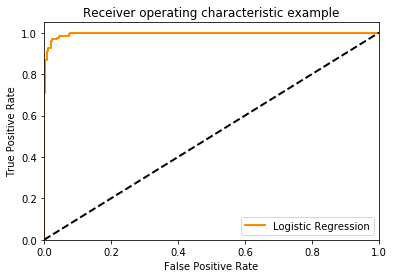

In [281]:
roc_log_reg  = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1], pos_label=1)
plt.figure()
lw = 2
plt.plot(roc_log_reg[0], roc_log_reg[1], color='darkorange',
         lw=lw, label='Logistic Regression')

#plt.plot(roc_d10[0], roc_d10[1], color='c',
         #lw=lw, label='Random Forest, max depth=10')
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [282]:
roc_log_reg

(array([0.        , 0.        , 0.        , 0.00413223, 0.00413223,
        0.00826446, 0.00826446, 0.01239669, 0.01239669, 0.02066116,
        0.02066116, 0.02479339, 0.02479339, 0.03719008, 0.03719008,
        0.04545455, 0.04545455, 0.07438017, 0.07438017, 0.0785124 ,
        0.0785124 , 1.        ]),
 array([0.        , 0.00813008, 0.70731707, 0.70731707, 0.8699187 ,
        0.8699187 , 0.91056911, 0.91056911, 0.92682927, 0.92682927,
        0.95934959, 0.95934959, 0.96747967, 0.96747967, 0.97560976,
        0.97560976, 0.98373984, 0.98373984, 0.99186992, 0.99186992,
        1.        , 1.        ]),
 array([1.8152123 , 0.8152123 , 0.55477583, 0.54706764, 0.47540383,
        0.4736316 , 0.45687679, 0.44369188, 0.43790017, 0.43316265,
        0.42752686, 0.42702037, 0.41753787, 0.39453149, 0.38964524,
        0.36124333, 0.36115653, 0.30847629, 0.30249441, 0.29996935,
        0.2975183 , 0.01663586]))

test, train split and then vectorize

Model

In [139]:
df_final

,Article,Satire,CNN,Fox
0,palo alto ca frustrated at their lack of progr...,1,0,0
1,washington after passage of a bill to block pr...,1,0,0
2,washington deciding it was time to “let the dr...,1,0,0
3,lawton ok brought to the brink of tears by the...,1,0,0
4,rockford md instinctively exerting his dominan...,1,0,0
5,hanoi vietnam tearing up as he described the c...,1,0,0
6,austin tx expressing his concern that the rela...,1,0,0
7,vatican city hoping to gain new insights into ...,1,0,0
8,washington demonstrating their findings with a...,1,0,0
9,portland or speculating that he probably shoul...,1,0,0


In [106]:
t2

' () The shooting Friday at Fort   International Airport may test the bounds of something that is entirely legal and commonplace in the United States: Flying with a gun and ammunition. The incident highlights the peculiarities and seeming contradictions of local, state and federal gun laws inside the nation’s airports: It is legal for a passenger to travel with a firearm and ammunition in checked baggage, but inside baggage claim or at a ticketing counter, that person might otherwise be breaking the law if the weapon is out in the open or carried on their person. Five people were shot dead and eight wounded in a baggage claim area at Florida’s   airport, and law enforcement sources tell  the suspect had legally brought the firearm and ammunition in his checked baggage while flying from Anchorage to Fort Lauderdale. When he reached his destination, the suspect went to baggage claim, got his baggage, took out the gun and began firing, sources told .  Airport officials say that Friday’s i

In [107]:
t3 = re.sub('[)(,.]', '', t2)

In [108]:
t3

'  The shooting Friday at Fort   International Airport may test the bounds of something that is entirely legal and commonplace in the United States: Flying with a gun and ammunition The incident highlights the peculiarities and seeming contradictions of local state and federal gun laws inside the nation’s airports: It is legal for a passenger to travel with a firearm and ammunition in checked baggage but inside baggage claim or at a ticketing counter that person might otherwise be breaking the law if the weapon is out in the open or carried on their person Five people were shot dead and eight wounded in a baggage claim area at Florida’s   airport and law enforcement sources tell  the suspect had legally brought the firearm and ammunition in his checked baggage while flying from Anchorage to Fort Lauderdale When he reached his destination the suspect went to baggage claim got his baggage took out the gun and began firing sources told   Airport officials say that Friday’s incident could 

In [ ]:
def fox_word_count(content_list):
    '''
    Takes in a list of fox articles that is a list of strings
    and then returns an average word count for each article.
    input: list of strings
    output: average word count per article
    '''
    
    count = 0
    words = 0
    
    
    # Come back for more preprocessing
    # Right now this is just a rough estimate
    # because the numbers in the articles are messing up
    # the count
    # (), "" are also messing up the count
    for x in content_list:
        length = len(x.split()) 
        words += length
        count += 1
    print(count)
    print(words)
    return words/count

In [ ]:
def word_count(content_list):
    '''
    Takes in a list of fox articles that is a list of strings
    and then returns an average word count for each article.
    input: list of strings
    output: average word count per article
    '''
    
    count = 0
    words = 0
    
    
    # Come back for more preprocessing
    # Right now this is just a rough estimate
    # because the numbers in the articles are messing up
    # the count
    # (), "" are also messing up the count
    for x in content_list:
        length = len(x.split()) 
        words += length
        count += 1
    print(count)
    print(words)
    return words/count

In [ ]:
def cnn_word_count(content_list):
    '''
    Takes in content of all cnn articles as a list. 
    Then removes the '(CNN)' that is at the beginning of every
    article and gets a word count. 
    input: list of strings  
    output: float - average number of words per article
    '''
    count = 0
    words = 0
    # Come back for more preprocessing
    # Right now this is just a rough estimate
    # because the numbers in the articles are messing up
    # the count
    # (), "" are also messing up the count
    for article in content_list:
        split_article = article.split()
        for word in split_article:
            if word == '(CNN)':
                split_article.remove(word)
        length = len(split_article) 
        words += length
        count += 1
    print(count)
    print(words)
    return words/count